# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Import Model Results

In [1]:
config_file = "../config_sim_all-models-5_theoretical_20240420.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_all-models-5_theoretical_20240420.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res

,index,model_id,model,simulation,n_train,noise_sd,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,RandomForestRegressor_20240420_1_1000_0.1,RandomForestRegressor,1,1000,0.1,1.033248,2.564450,0.797747,1.262403,0.958388,0.895720
1,0,XGBRegressor_20240420_1_1000_0.1,XGBRegressor,1,1000,0.1,0.000746,0.293658,0.019431,0.406508,0.999970,0.988059
2,0,DecisionTreeRegressor_20240420_1_1000_0.1,DecisionTreeRegressor,1,1000,0.1,1.592632,5.658174,0.985326,1.879092,0.935860,0.769917
3,0,SVR_20240420_1_1000_0.1,SVR,1,1000,0.1,0.009583,0.018337,0.081111,0.103061,0.999614,0.999254
4,0,ElasticNet_20240420_1_1000_0.1,ElasticNet,1,1000,0.1,5.716357,6.326010,1.822135,1.928950,0.769785,0.742760
5,0,GAM_20240420_1_1000_0.1,GAM,1,1000,0.1,0.012509,0.014902,0.086171,0.093055,0.999496,0.999394
6,0,RandomForestRegressor_20240420_1_1000_0.5,RandomForestRegressor,1,1000,0.5,1.164493,2.879359,0.844467,1.334659,0.953601,0.884573
7,0,XGBRegressor_20240420_1_1000_0.5,XGBRegressor,1,1000,0.5,0.017015,0.589488,0.100901,0.600300,0.999322,0.976369
8,0,DecisionTreeRegressor_20240420_1_1000_0.5,DecisionTreeRegressor,1,1000,0.5,1.291587,5.835857,0.864694,1.899462,0.948537,0.766054
9,0,SVR_20240420_1_1000_0.5,SVR,1,1000,0.5,0.217337,0.292701,0.353357,0.434191,0.991340,0.988266


## Import PDP Results

In [5]:
effects_results_storage = config.get("storage", "effects_results")
df_pdp_res = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df_pdp_res

,index,model_id,model,simulation,n_train,noise_sd,metric,x_1,x_2,x_3,x_4,x_5
0,0,RandomForestRegressor_20240420_1_1000_0.1,RandomForestRegressor,1,1000,0.1,mean_squared_error,0.180076,0.217016,0.670829,0.110735,0.089038
1,0,XGBRegressor_20240420_1_1000_0.1,XGBRegressor,1,1000,0.1,mean_squared_error,0.033126,0.037456,0.026116,0.017440,0.006373
2,0,DecisionTreeRegressor_20240420_1_1000_0.1,DecisionTreeRegressor,1,1000,0.1,mean_squared_error,0.196085,0.198124,0.788986,0.159278,0.092678
3,0,SVR_20240420_1_1000_0.1,SVR,1,1000,0.1,mean_squared_error,0.015542,0.023117,0.007918,0.000040,0.000365
4,0,ElasticNet_20240420_1_1000_0.1,ElasticNet,1,1000,0.1,mean_squared_error,0.972314,1.002115,2.296801,0.000887,0.001069
5,0,GAM_20240420_1_1000_0.1,GAM,1,1000,0.1,mean_squared_error,0.016391,0.021993,0.007518,0.000297,0.000313
6,0,RandomForestRegressor_20240420_1_1000_0.5,RandomForestRegressor,1,1000,0.5,mean_squared_error,0.183664,0.219501,0.639930,0.101102,0.095004
7,0,XGBRegressor_20240420_1_1000_0.5,XGBRegressor,1,1000,0.5,mean_squared_error,0.038568,0.042233,0.031817,0.021237,0.014175
8,0,DecisionTreeRegressor_20240420_1_1000_0.5,DecisionTreeRegressor,1,1000,0.5,mean_squared_error,0.151053,0.309740,0.646266,0.134242,0.128095
9,0,SVR_20240420_1_1000_0.5,SVR,1,1000,0.5,mean_squared_error,0.014997,0.019612,0.006570,0.000574,0.001520


## Joint Analysis

In [6]:
df_melted = create_joined_melted_df(df_model_res, df_pdp_res)
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,noise_sd_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,RandomForestRegressor_20240420_1_1000_0.1,RandomForestRegressor,1,1000,0.1,1.033248,2.564450,0.797747,1.262403,0.958388,0.895720,x_1,0.180076
1,XGBRegressor_20240420_1_1000_0.1,XGBRegressor,1,1000,0.1,0.000746,0.293658,0.019431,0.406508,0.999970,0.988059,x_1,0.033126
2,DecisionTreeRegressor_20240420_1_1000_0.1,DecisionTreeRegressor,1,1000,0.1,1.592632,5.658174,0.985326,1.879092,0.935860,0.769917,x_1,0.196085
3,SVR_20240420_1_1000_0.1,SVR,1,1000,0.1,0.009583,0.018337,0.081111,0.103061,0.999614,0.999254,x_1,0.015542
4,ElasticNet_20240420_1_1000_0.1,ElasticNet,1,1000,0.1,5.716357,6.326010,1.822135,1.928950,0.769785,0.742760,x_1,0.972314


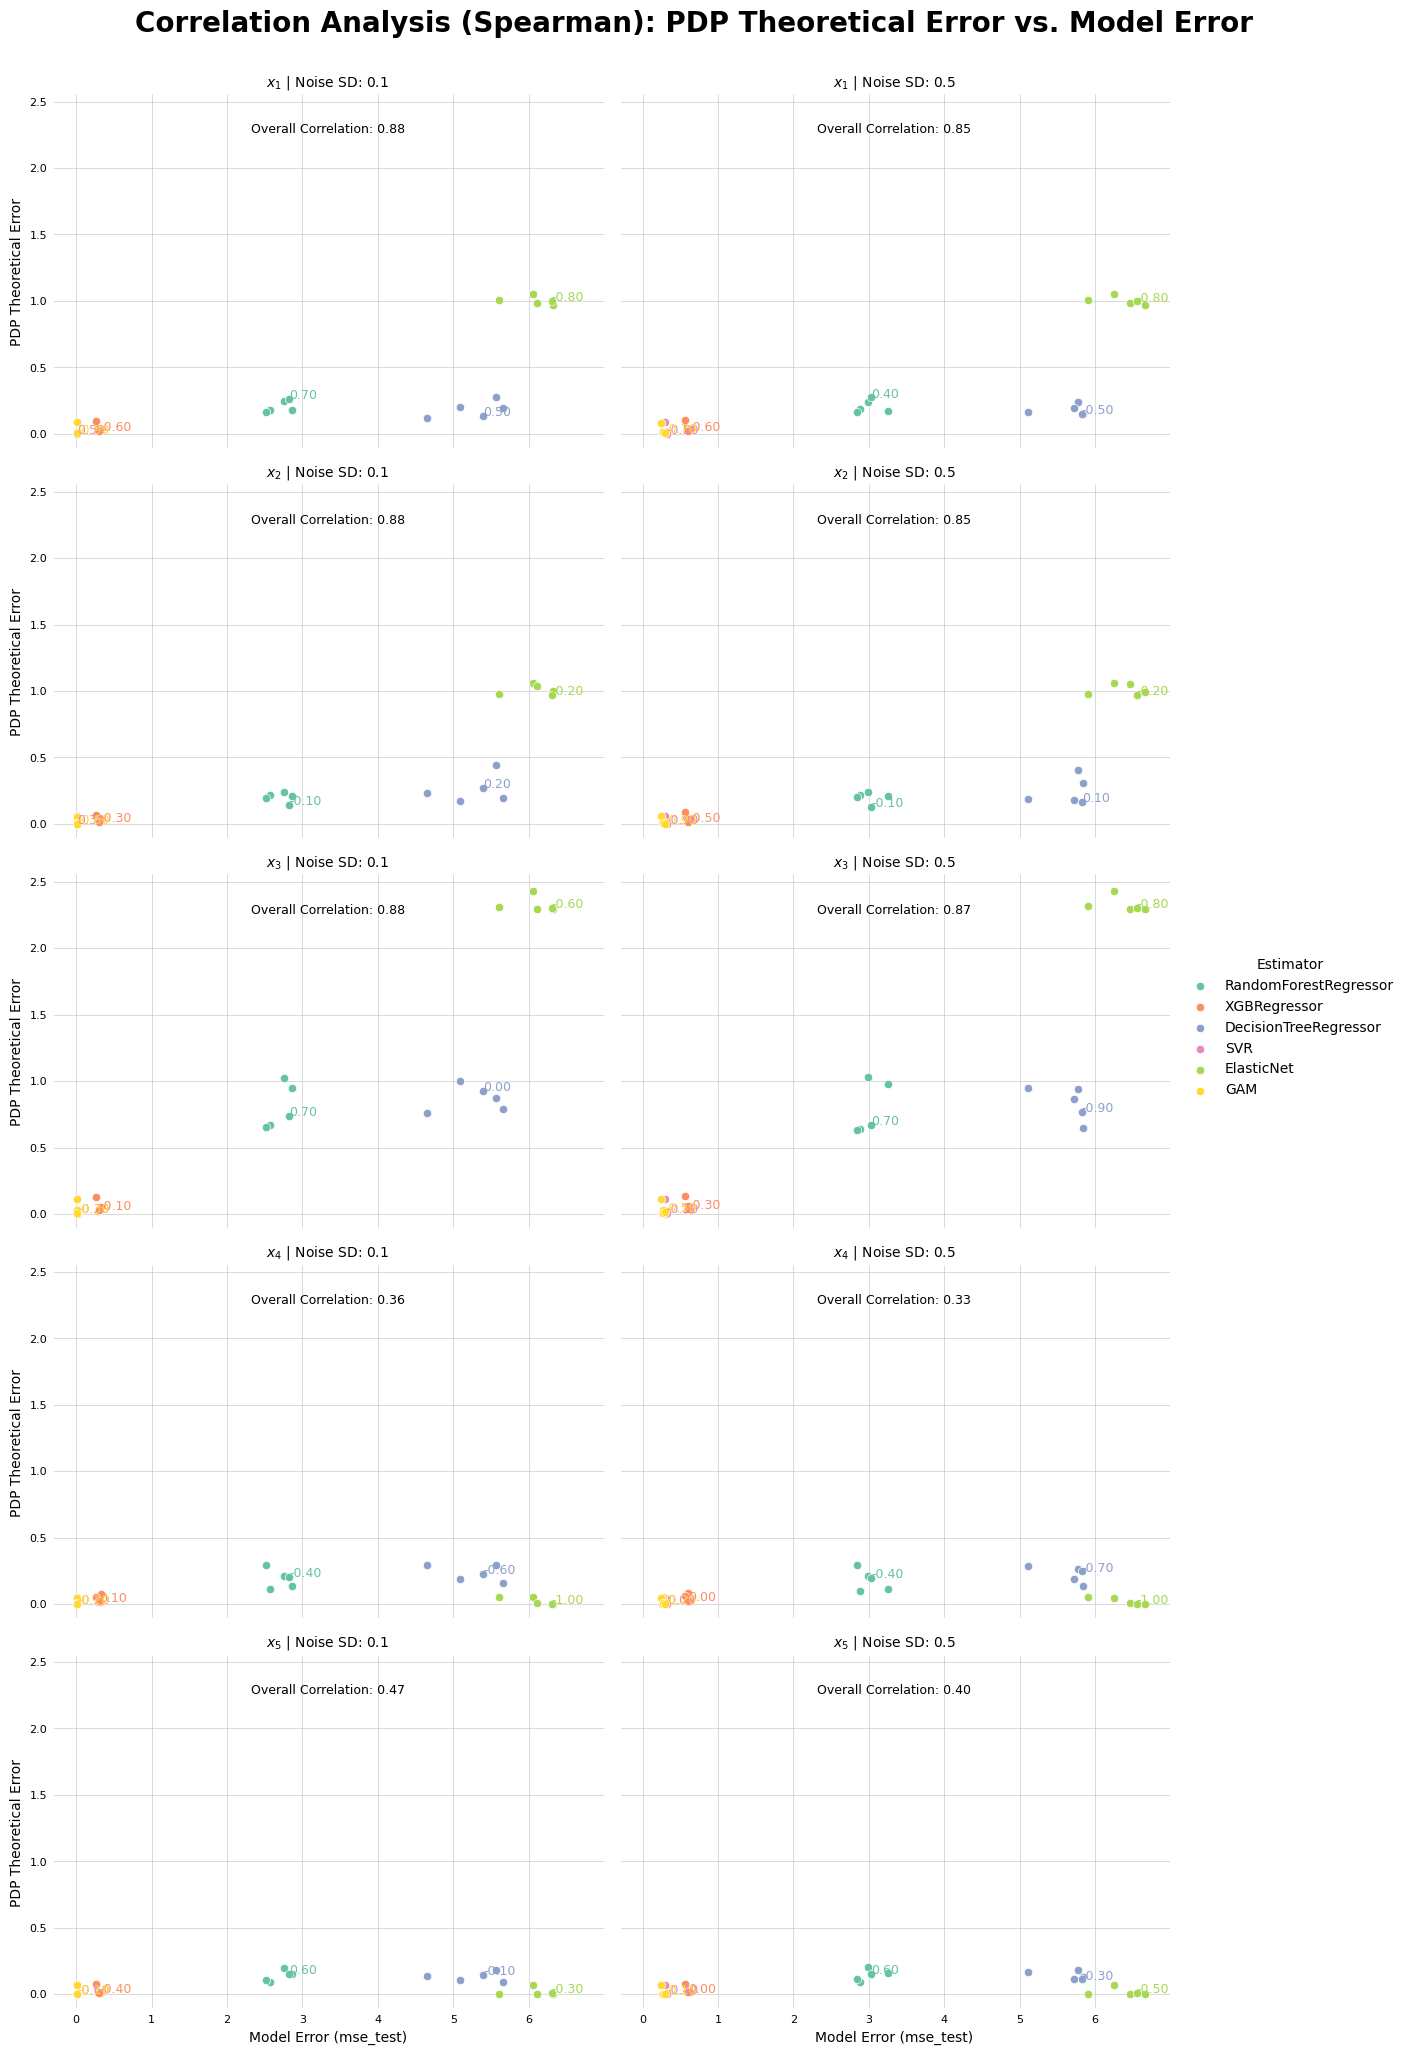

In [11]:
models = df_melted["model_x"].unique().tolist()

g = plot_correlation_analysis(df_melted, models, model_error_metric="mse_test", feature_effect="PDP Theoretical", correlation_metric="Spearman", overall_correlation=True)
g;